In [36]:
import pandas as pd

In [5]:
p = r"D:\back ups\Context_switch_output\pilot\data\proper\B46852\D4\raw_bonsai_data\NEW2342342342346346546DLC_resnet50_pilotApr21shuffle1_200000.h5"

In [37]:
p = r"D:\pilot\data\proper\B46852\D4\cylander_behaviour\exports\NEW2342342342346346546DLC_resnet50_pilotApr21shuffle1_200000.h5"

In [38]:
df = pd.read_hdf(p)

In [39]:
df

,frame,left_ear_x,left_ear_y,right_ear_x,right_ear_y,tail_x,tail_y,motion
0,0,256.867065,214.233246,272.444366,221.255585,261.287537,270.360809,NaN
1,1,256.625214,214.134338,272.189911,221.285324,261.150879,270.393311,0.117783
2,2,256.628143,214.123917,272.190674,221.281754,261.158508,270.386566,0.005157
3,3,256.618439,213.959167,272.174255,221.258575,261.184570,270.376862,0.019798
4,4,255.516037,212.716873,271.694641,220.056137,260.723145,270.092224,0.791008
...,...,...,...,...,...,...,...,...
25196,25196,390.049896,191.557236,397.858154,204.179138,341.982758,231.559052,0.398506
25197,25197,389.611298,190.986511,398.380493,203.216217,343.284363,232.816620,0.766823
25198,25198,389.737305,191.084396,398.238892,203.395355,344.996216,234.071167,0.160370
25199,25199,389.516144,190.904587,398.682526,202.835724,345.676880,234.630829,0.501633


In [8]:
COLUMNS = ["x", "y", "likelihood"]
BODYPARTS = ["right_ear", "left_ear", "tail"]

def tidy_dataframe(df):
    df_list = []
    for part in BODYPARTS:
        columns = tuple([f"{part}_{col}" for col in COLUMNS])
        df_list.append(
            df
            .loc[:, df.columns.get_level_values("bodyparts") == part]
            .pipe(lambda x: pd.DataFrame(x.values, columns=columns))
            .drop(f"{part}_likelihood", axis=1)
        )
    return pd.concat(df_list, axis=1).reset_index().rename(columns={"index": "frame"})

In [9]:
out = tidy_dataframe(df)

<AxesSubplot:xlabel='left_ear_x'>

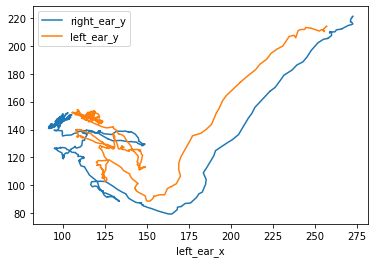

In [10]:
ax = out.iloc[:1000].plot("right_ear_x", "right_ear_y")
out.iloc[:1000].plot("left_ear_x", "left_ear_y", ax=ax)

In [29]:
def calculate_motion(df, estimator=np.mean, frame_col="frame"):
    df_motion = df.diff().abs()
    if frame_col:
        df_motion = df_motion.drop(frame_col, axis=1)
    if estimator == np.mean:
        return df_motion.mean(axis=1)
    elif estimator == np.median:
        return df_motion.median(axis=1)
    elif estimator == np.max:
        return df_motion.max(axis=1)
    elif estimator == np.min:
        return df_motion.min(axis=1)
    else:
        return df_motion.apply(estimator, axis=1)
    


out.assign(motion=lambda x: calculate_motion(x))

,frame,right_ear_x,right_ear_y,left_ear_x,left_ear_y,tail_x,tail_y,motion
0,0,272.444366,221.255585,256.867065,214.233246,261.287537,270.360809,NaN
1,1,272.189911,221.285324,256.625214,214.134338,261.150879,270.393311,0.132352
2,2,272.190674,221.281754,256.628143,214.123917,261.158508,270.386566,0.005343
3,3,272.174255,221.258575,256.618439,213.959167,261.184570,270.376862,0.041636
4,4,271.694641,220.056137,255.516037,212.716873,260.723145,270.092224,0.795469
...,...,...,...,...,...,...,...,...
25196,25196,397.858154,204.179138,390.049896,191.557236,341.982758,231.559052,0.454661
25197,25197,398.380493,203.216217,389.611298,190.986511,343.284363,232.816620,0.842293
25198,25198,398.238892,203.395355,389.737305,191.084396,344.996216,234.071167,0.585172
25199,25199,398.682526,202.835724,389.516144,190.904587,345.676880,234.630829,0.440760


In [34]:
out.to_hdf("tmp.h5", key="tidy_dlc", mode="w")

In [35]:
pd.read_hdf("tmp.h5")

,frame,right_ear_x,right_ear_y,left_ear_x,left_ear_y,tail_x,tail_y
0,0,272.444366,221.255585,256.867065,214.233246,261.287537,270.360809
1,1,272.189911,221.285324,256.625214,214.134338,261.150879,270.393311
2,2,272.190674,221.281754,256.628143,214.123917,261.158508,270.386566
3,3,272.174255,221.258575,256.618439,213.959167,261.184570,270.376862
4,4,271.694641,220.056137,255.516037,212.716873,260.723145,270.092224
...,...,...,...,...,...,...,...
25196,25196,397.858154,204.179138,390.049896,191.557236,341.982758,231.559052
25197,25197,398.380493,203.216217,389.611298,190.986511,343.284363,232.816620
25198,25198,398.238892,203.395355,389.737305,191.084396,344.996216,234.071167
25199,25199,398.682526,202.835724,389.516144,190.904587,345.676880,234.630829
